In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.

We are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 player per group.

winPlacePerc - Parameters
Let's talk about availabe feature in the given PubG Data.

Data fields

DBNOs - Number of enemy players knocked.

assists - Number of enemy players this player damaged that were killed by teammates.

boosts - Number of boost items used.

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

headshotKills - Number of enemy players killed with headshots.

heals - Number of healing items used.

Id - Player’s Id

killPlace - Ranking in match of number of enemy players killed.

killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

killStreaks - Max number of enemy players killed in a short amount of time.

kills - Number of enemy players killed.

longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

matchDuration - Duration of match in seconds.

matchId - ID to identify match. There are no matches that are in both the training and testing set.

matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

revives - Number of times this player revived teammates.

rideDistance - Total distance traveled in vehicles measured in meters.

roadKills - Number of kills while in a vehicle.

swimDistance - Total distance traveled by swimming measured in meters.

teamKills - Number of times this player killed a teammate.

vehicleDestroys - Number of vehicles destroyed.

walkDistance - Total distance traveled on foot measured in meters.

weaponsAcquired - Number of weapons picked up.

winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

numGroups - Number of groups we have data for in the match.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match

In [1]:
#Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [2]:
#Importing the dataset
data = pd.read_csv("pubg.csv")

In [3]:

pwd

'C:\\Users\\hp\\project11'

In [4]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [6]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [7]:
#getting informtaion regarding float, int or object type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [8]:
#checking for missing values
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [9]:
#Checking for the missing data in WinPlacePerc
data[data.winPlacePerc.isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [10]:
#Dropping the single missing value column from WinPlacePerc
data.drop(2744604,inplace=True)

# EDA

In [11]:
# With respect to different matchtype

In [12]:
#!pip install sweetviz  #Automated Library for visualization

#import sweetviz as sv #  library for univariant analysis
#my_report = sv.analyze(data)## pass the original dataframe
#my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

Text(0.5, 1.0, 'kills for different matches')

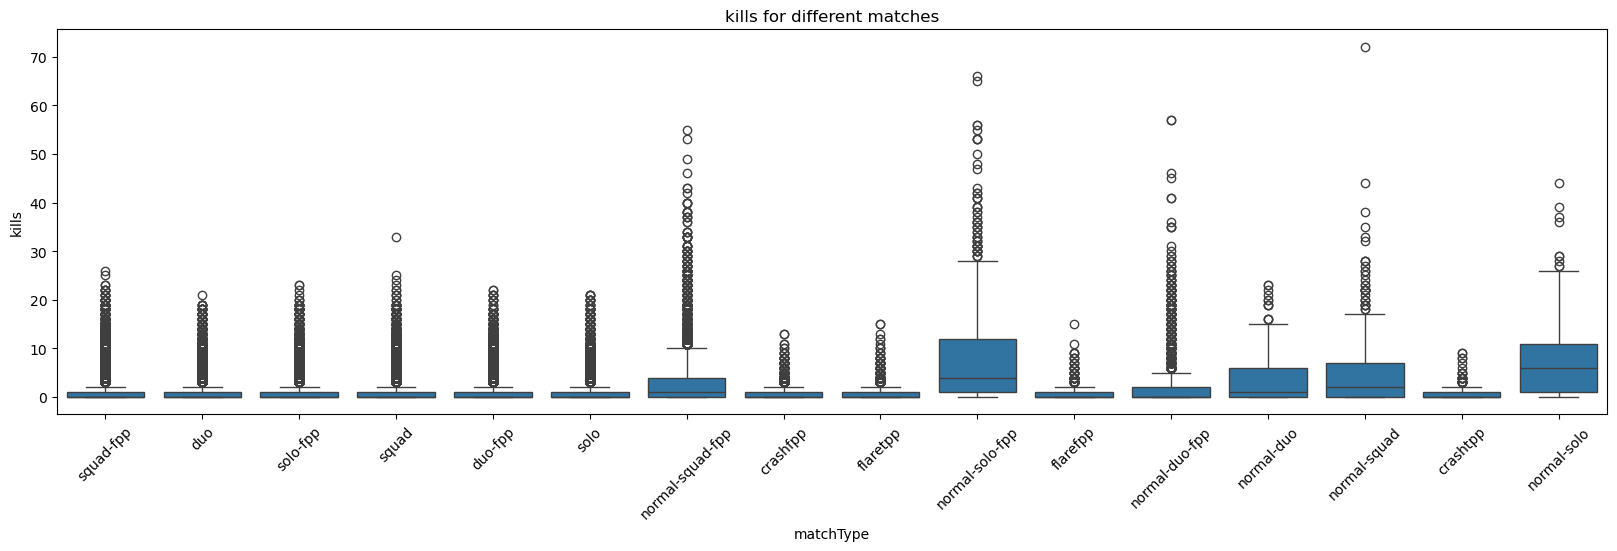

In [13]:
   #Plotting box plot between different match type and kills
fig,axes = plt.subplots(figsize=(20,5))
sns.boxplot(y='kills', x='matchType', data=data, ax= axes)
plt.xticks(rotation=45)
plt.title('kills for different matches')

Text(0.5, 1.0, 'Frequecy of different types of match')

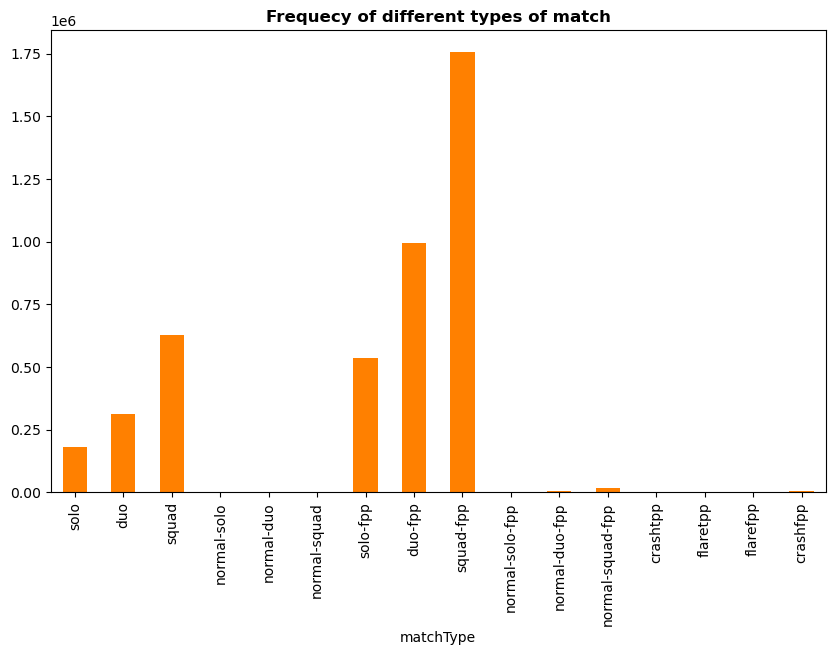

In [14]:
# Frequecy of different types of match
matchTypes = ["solo", "duo", "squad", "normal-solo", "normal-duo", "normal-squad", "solo-fpp", "duo-fpp", "squad-fpp", "normal-solo-fpp", "normal-duo-fpp", "normal-squad-fpp", "crashtpp", "flaretpp", "flarefpp", "crashfpp"]
data["matchType"].value_counts()[matchTypes].plot(kind="bar", figsize=(10,6), color="#ff8000")
plt.title("Frequecy of different types of match", fontweight="bold")


In [ ]:
#!pip install seaborn --upgrade

In [ ]:
#import matplotlib

#print(matplotlib.__version__)

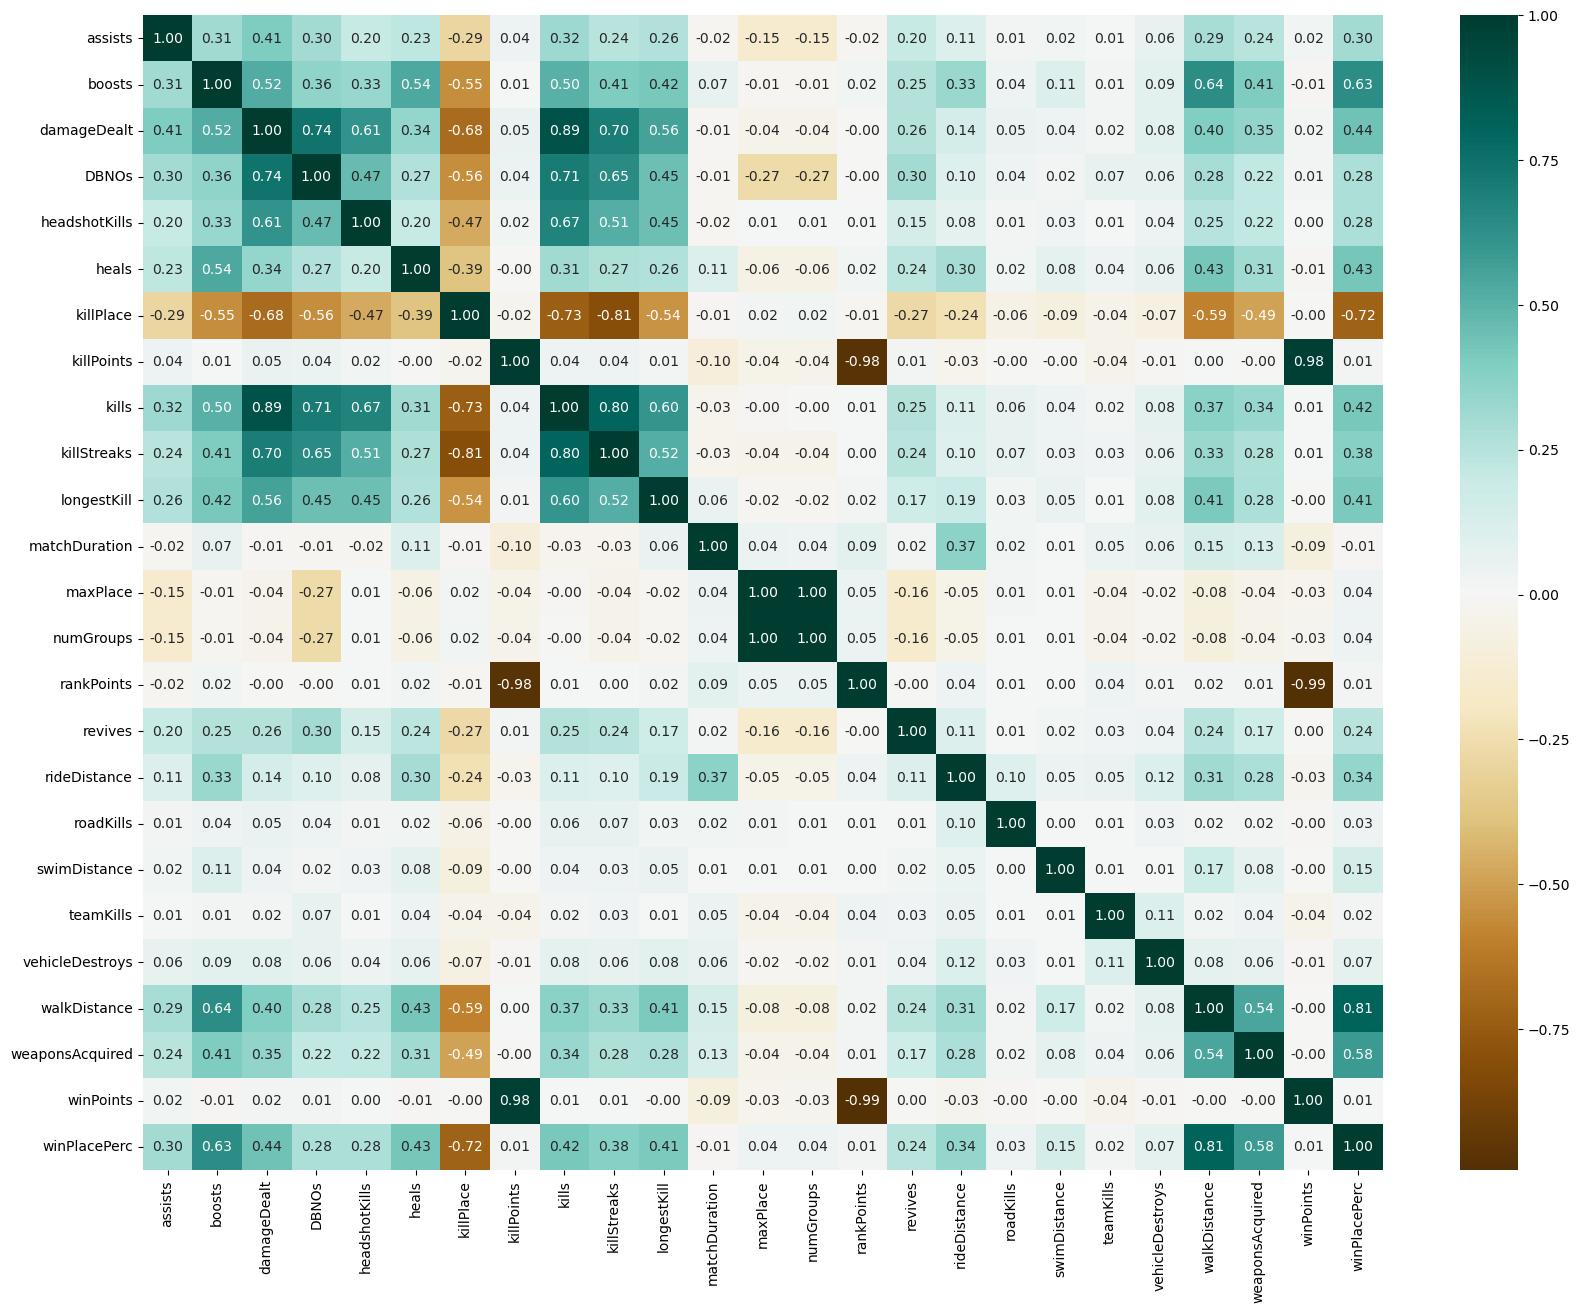

In [15]:
#Checking the correlation between all the attributes
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_data.corr()

# Plot correlation heatmap
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax, cmap="BrBG")
plt.show()



winPlacePerc is our to be predicted value. The features with the highest linear correlation are walkDistance (0.81) killPlace (-0.71) boosts (0.62) weaponsAcquired (0.58) damageDealt (0.44)

## Dealing with outliers and Data Preprocessing


 Select numeric columns where you want to check for outliers
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

Create boxplots for each numeric column to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot of Numeric Features in PUBG Dataset')
plt.xticks(rotation=45)
plt.show()

### Checking for distance and total distance with respect to number of kills
Analysing the walk distance traveled, there are 3 ways to do so

rideDistance
walkDistance
swimDistance

C:\Users\hp\AppData\Local\Temp\ipykernel_12580\774480213.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rideDistance'], bins=100)


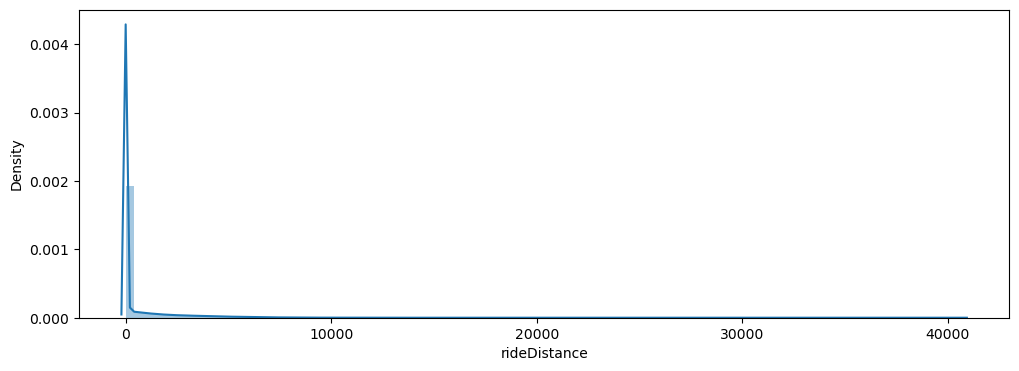

(498, 29)

In [17]:
#riding distance
plt.figure(figsize=(12,4))
sns.distplot(data['rideDistance'], bins=100)
plt.show()

data[data['rideDistance']>=15000].shape

In [18]:
data.drop(data[data['rideDistance']>15000].index, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12580\4258037768.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rideDistance'], bins=100)


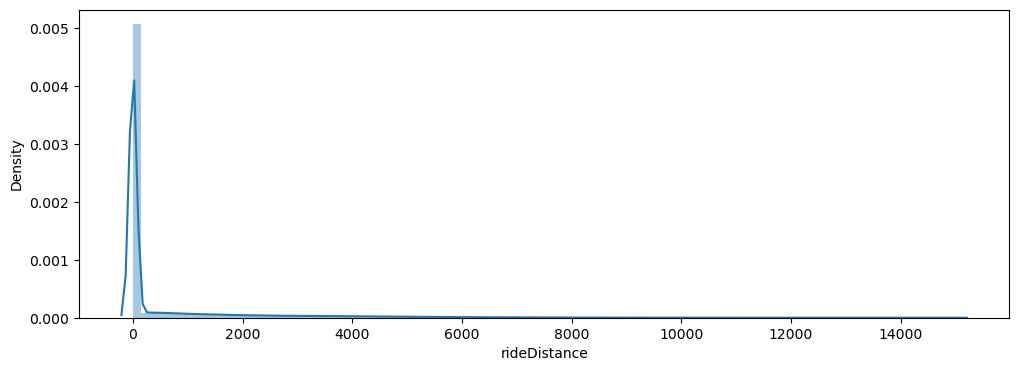

(1, 29)

In [19]:
plt.figure(figsize=(12,4))
sns.distplot(data['rideDistance'], bins=100)
plt.show()

data[data['rideDistance']>=15000].shape

C:\Users\hp\AppData\Local\Temp\ipykernel_12580\3578518129.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['walkDistance'], bins=100)


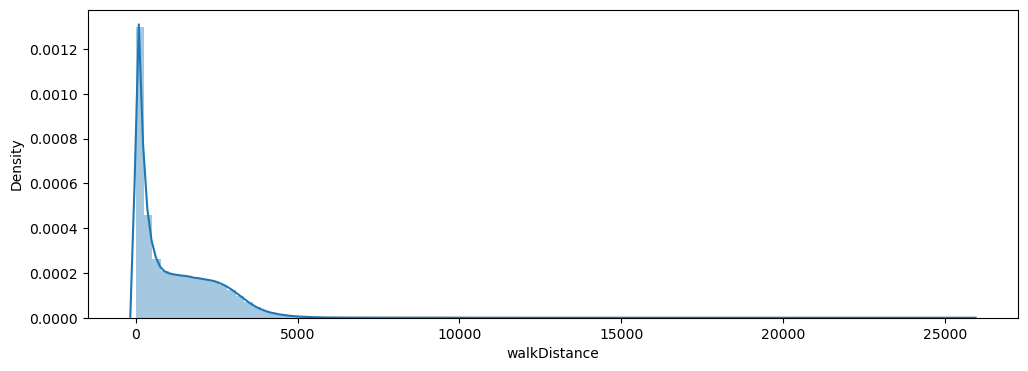

(219, 29)

In [20]:
#Walk Distance
plt.figure(figsize=(12,4))
sns.distplot(data['walkDistance'], bins=100)
plt.show()

data[data['walkDistance']>=10000].shape

In [21]:
#walk distance greater that 1km (10000m) will be dropped
data.drop(data[data['walkDistance']>=10000].index,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12580\102026116.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.swimDistance,bins=10)


(138, 29)

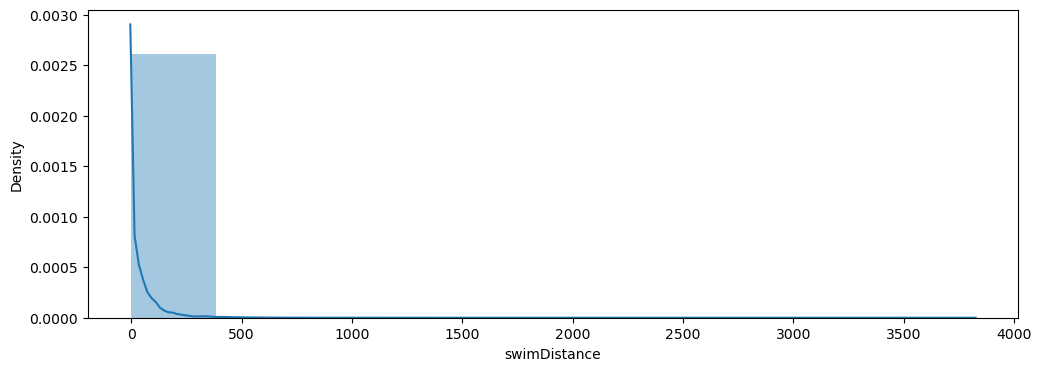

In [22]:
#Swim distance
plt.subplots(figsize=(12, 4))
sns.distplot(data.swimDistance,bins=10)
data[data['swimDistance']>=1000].shape

In [23]:
#swin distance greater than 1000m will be dropped
data.drop(data[data['swimDistance']>=1000].index,inplace=True)

### Kills with respect to total distance

In [24]:
#To find the total distance travelled
data['total_distance']=data.rideDistance+data.walkDistance+data.swimDistance
print(data.total_distance)
# checking for kills without moving
data['killsWithoutMoving'] = ((data['kills'] > 0) & (data['total_distance'] == 0))
# find the count.
data['killsWithoutMoving'].value_counts()

0           244.8000
1          1445.0445
2           161.8000
3           202.7000
4            49.7500
             ...    
4446961    2311.0000
4446962      81.7000
4446963     790.8840
4446964    2748.0000
4446965    2613.0000
Name: total_distance, Length: 4446111, dtype: float64


killsWithoutMoving
False    4444576
True        1535
Name: count, dtype: int64

In [25]:
#dropping those values which are true for kills without moving
data.drop(data[data['killsWithoutMoving'] == True].index, inplace=True)

### with respect to Roadkills

In [26]:
#checking value_counts for Roadkills
data['roadKills'].value_counts()

roadKills
0     4431617
1       11215
2        1293
3         297
4          72
5          36
6          20
7          11
8           7
9           2
11          2
10          2
14          1
18          1
Name: count, dtype: int64

In [27]:
#the roadlkills usually between 0-13, thus above that are the anomalies which will be dropped
data.drop(data[data['roadKills']>=10].index,inplace=True)

### with respect to Total Kills

In [28]:
#checking the value_counts for total kills
data['kills'].value_counts()

kills
0     2529158
1      927505
2      472225
3      232238
4      124397
5       66475
6       37861
7       21739
8       12713
9        7580
10       4562
11       2756
12       1726
13       1107
14        742
15        468
16        319
17        225
18        159
19        105
20         94
22         74
21         61
23         40
24         39
26         24
25         24
28         22
27         15
33         12
29         11
31         11
30         11
38          6
35          6
36          6
34          5
41          5
37          5
39          4
32          4
40          4
53          4
42          3
56          2
44          2
55          2
57          2
43          2
46          2
66          1
50          1
65          1
48          1
47          1
45          1
49          1
72          1
Name: count, dtype: int64

In [29]:
#dropping columns with kills more than 35
data.drop(data[data['kills'] >=35].index, inplace=True)

### with respect to weapons acquired

C:\Users\hp\AppData\Local\Temp\ipykernel_12580\1687967987.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['weaponsAcquired'], bins=100)


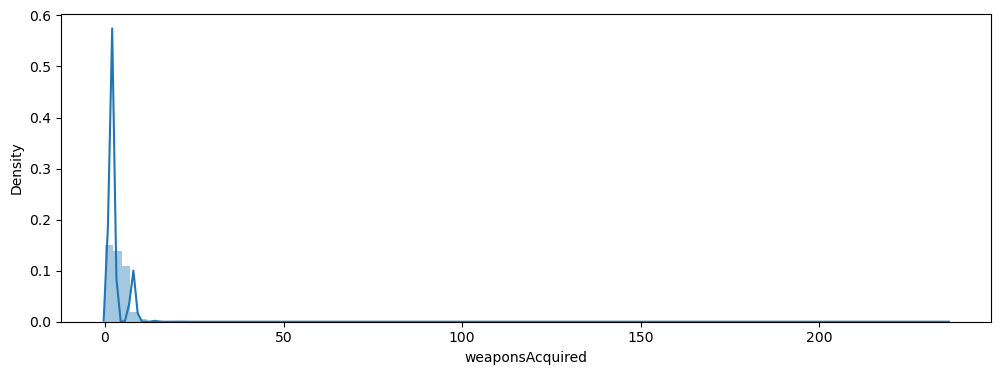

In [30]:
#plot to check 
plt.figure(figsize=(12,4))
sns.distplot(data['weaponsAcquired'], bins=100)
plt.show()

In [31]:
#dropping data with more than 50 weapons acquired
data[data.weaponsAcquired>=50].shape

(137, 31)

C:\Users\hp\AppData\Local\Temp\ipykernel_12580\1847913677.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['heals'], bins=100)


(135, 31)


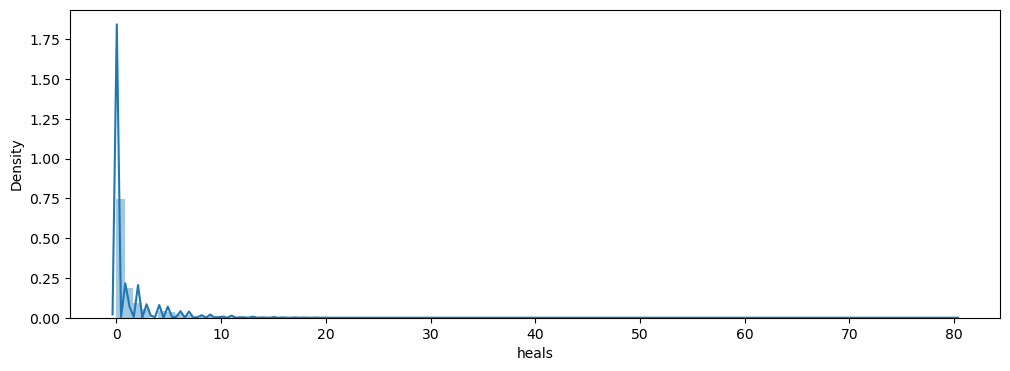

In [32]:
plt.figure(figsize=(12,4))
sns.distplot(data['heals'], bins=100)
#to check the shape and the number
print(data[data.heals>=40].shape)

In [33]:
data.drop(data[data.heals>=40].index,inplace=True)

### Dealing with Categorical Variables

In [34]:
print(data.select_dtypes(include='object').describe().columns.tolist())

['Id', 'groupId', 'matchId', 'matchType']


In [35]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for categorical variables

features_cat = [c for c in data if 'matchType' in c]
for f in features_cat:
    le = LabelEncoder()
    le.fit(data[f])
    data[f] = le.transform(data[f])


# Label encoding for categorical variables

print('Before encoding we have {} variables in data'.format(data.shape[1]))
print('After encoding we have {} variables in data'.format(data.shape[1]))

Before encoding we have 31 variables in data
After encoding we have 31 variables in data


In [36]:
data['matchType']

0          15
1          15
2           2
3          15
4          13
           ..
4446961    15
4446962    12
4446963    15
4446964    15
4446965    13
Name: matchType, Length: 4444372, dtype: int32

In [37]:
data['matchType'].value_counts()

matchType
15    1755887
3      996501
14     626430
13     536350
2      313534
12     181787
11      16205
0        6286
7        5401
5        2505
9        1476
4         718
10        451
1         371
8         277
6         193
Name: count, dtype: int64

In [38]:

data.columns


Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'total_distance',
       'killsWithoutMoving'],
      dtype='object')

In [39]:
#dropping unnecessary columns which are present and which were created for finding outliers
data.drop(columns=['killsWithoutMoving', 
                   'total_distance', 
                   'Id',
                   'groupId',
                   'matchId'], inplace=True)

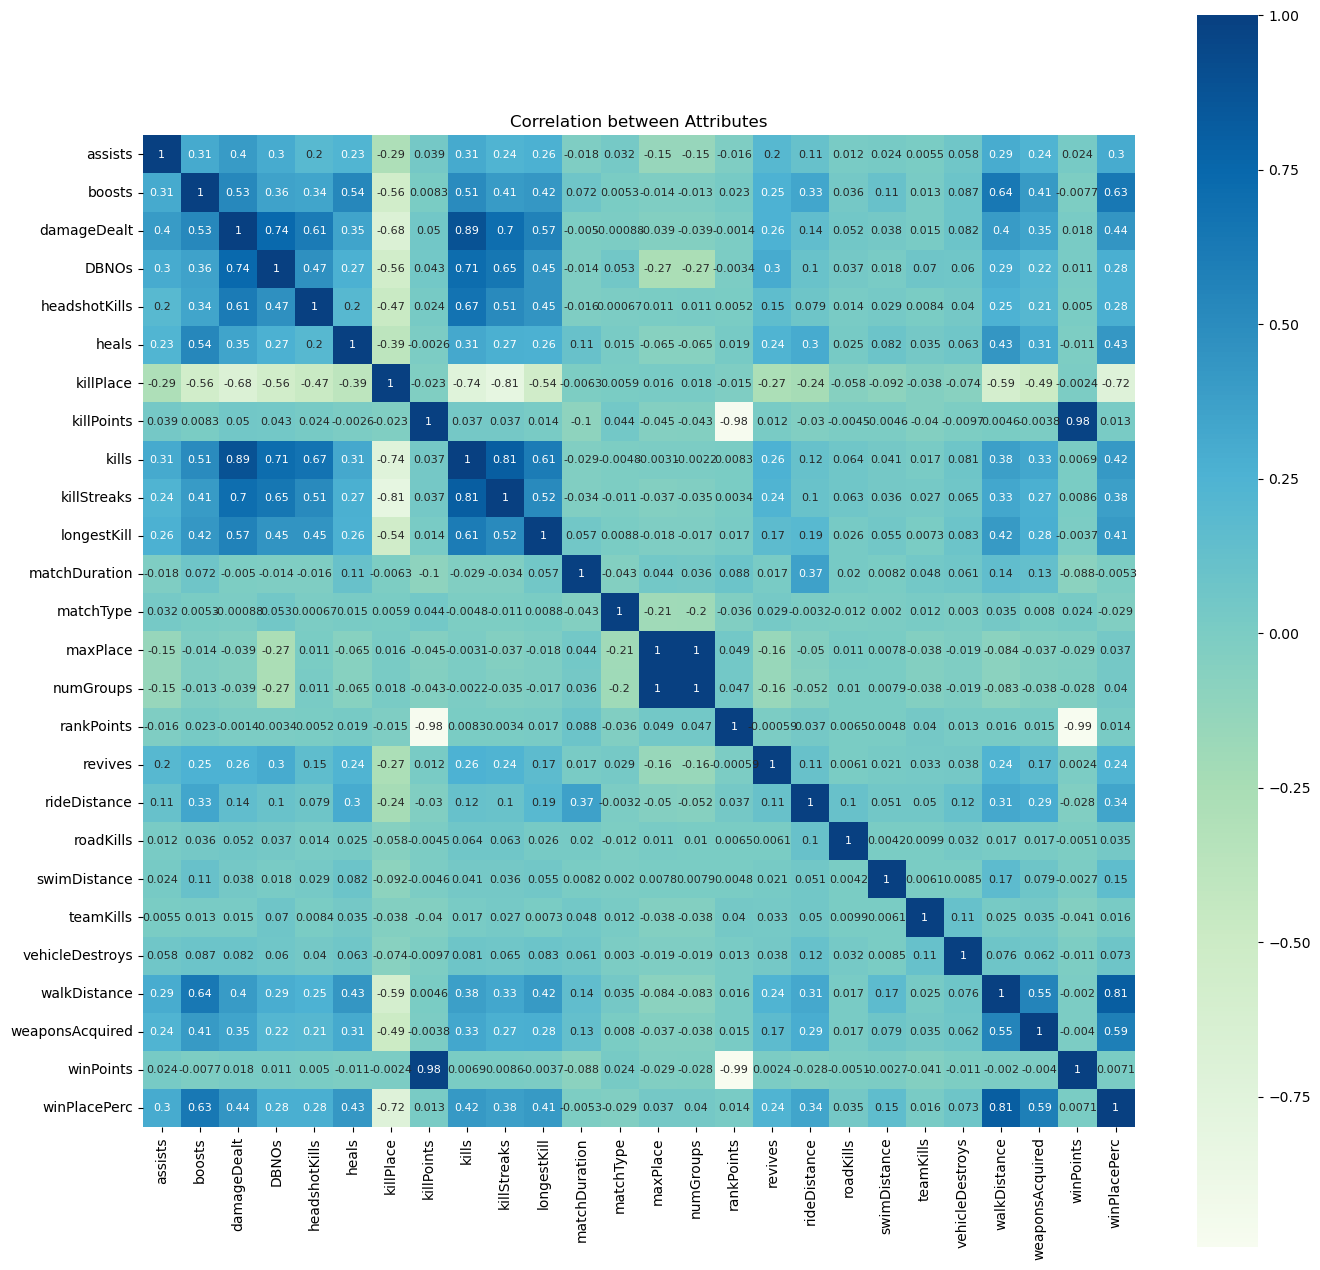

In [40]:
corr=data.corr()
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), square=True, cbar=True, annot=True,cmap='GnBu',annot_kws = {'size': 8})
plt.title('Correlation between Attributes')
plt.show()

In [41]:
# split data into train and test sets
x = data.drop(['winPlacePerc'],axis=1)
y = data['winPlacePerc']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)

## MODEL SELECTION ,MODEL EVALUATION

# lightGBM

In [42]:
pip install lightgbm

  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.3.0-py3-none-win_amd64.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [43]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)# creating a lightgbm dataset

#setting up model parameters
params = {}
params['objective'] = 'regression'
params['metric'] = 'mae'

In [44]:
#Training the LightGBM model
model = lgb.train(params, d_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.255447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2811
[LightGBM] [Info] Number of data points in the train set: 2977729, number of used features: 25
[LightGBM] [Info] Start training from score 0.472651


In [45]:
#making prediction
y_pred=model.predict(x_test)

In [46]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {}".format(mae))

MAE: 0.05952315163462747


In [47]:
#Displaying the Predictions
y_pred.tolist()

[0.9973283435674052,
 0.37897783790211065,
 0.5214160964544273,
 0.7676789498223121,
 0.22905247538399942,
 0.8784731376829095,
 0.5425929809643333,
 0.9227466259227731,
 0.11970153333375619,
 0.20530026086464925,
 0.6728719437075342,
 0.3513463311045931,
 0.7958284772267656,
 0.8283207110294742,
 0.8813025317295191,
 0.08970745657709589,
 0.05485932849503805,
 0.4104017002314621,
 0.8222972653809635,
 0.058192840685452364,
 0.22525671965021574,
 0.7067022064345121,
 0.5787881392402677,
 0.44092734331832156,
 0.9154582707531469,
 0.7667292144287314,
 0.5086866874557773,
 0.5804791018179866,
 0.5286956002498513,
 0.26866038974209216,
 0.07690585785998301,
 0.021865370508076423,
 0.8570851238006574,
 0.8548897568656604,
 0.3619501562175357,
 0.8984729082381189,
 0.6847808828904752,
 0.9054773967087869,
 0.7791145513085279,
 0.14468374604248851,
 0.7765044568737405,
 0.29570226577692243,
 0.04705811676931483,
 0.407757819731519,
 0.02670295031997625,
 0.8060827373488872,
 0.43915043054514

## Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor
r_model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', n_jobs=-1)
r_model.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [49]:
pred = r_model.predict(x_test)
print('mae train: ', mean_absolute_error(pred, y_test))

mae train:  0.05946905043196667


In [50]:
#pred.tolist()

## Gradient Boosting Regression

In [52]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=40,min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,max_features='sqrt')
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(max_features='sqrt', n_estimators=40)

In [53]:
gb_pred = gb_model.predict(x_test)

In [54]:
gb_mse = mean_squared_error(y_test, gb_pred)
print(f"Gradient Boosting Mean Squared Error: {gb_mse}")

Gradient Boosting Mean Squared Error: 0.015359177633591644


In [55]:
#gb_pred.tolist()


## Task 1:Prepare a complete data analysis report on the given data.

# Data Analysis Report: PUBG Dataset

### Introduction
This report provides an in-depth analysis of the PUBG dataset, exploring various features and their relationships to the target variable winPlacePerc, which represents the winning placement percentage.

### Dataset Overview
The PUBG dataset contains information about player statistics in PlayerUnknown's Battlegrounds (PUBG) matches. It includes 4,444,372 entries and 29 columns, covering attributes such as assists, boosts, damage dealt, kills, match duration, and more. The target variable is winPlacePerc, representing the player's winning placement percentage.

### Data Cleaning and Preprocessing
Checked for missing values: Found one missing value in the winPlacePerc column, which was dropped.
Dealt with outliers: Detected and removed outliers in various features such as ride distance, walk distance, swim distance, road kills, total kills, weapons acquired, and heals.
Encoded categorical variables: Converted categorical variables like matchType into numerical values using label encoding.

### Exploratory Data Analysis (EDA)
Analyzed the distribution of kills for different match types using box plots.
Examined the frequency of different match types.
Investigated the correlation between attributes using a heatmap.
Explored the relationship between total distance traveled and kills.

### Model Building and Evaluation

### LightGBM Model
Trained a LightGBM regression model on the preprocessed data.
Achieved a Mean Absolute Error (MAE) of 0.0595 on the test set.

### Random Forest Regression Model
Implemented a Random Forest regression model with optimized parameters.
Obtained a MAE of 0.0594 on the test set.

### Gradient Boosting Regression Model
Developed a Gradient Boosting regression model with optimized parameters.
Calculated a Mean Squared Error (MSE) of 0.0141 on the test set.

### Conclusion
The analysis revealed significant correlations between attributes such as walk distance, boosts, weapons acquired, and winPlacePerc.
The trained regression models demonstrated reasonable predictive performance, with LightGBM and Random Forest models achieving similar MAE scores.
Further feature engineering and tuning could potentially improve model performance.

### Recommendations
Consider incorporating additional features or engineered features to enhance predictive accuracy.
Explore other advanced modeling techniques such as neural networks or ensemble methods for potentially better performance.

### Future Work
Conduct further analysis on player behavior and strategies to identify key factors influencing winPlacePerc.
Continuously refine and optimize models to adapt to changes in game dynamics or player behavior.

## Task 2: Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game.

we have performed a comprehensive data analysis and built predictive models using LightGBM, Random Forest Regression, and Gradient Boosting Regression to predict the win probability of a PUBG match and here are the important factors affecting the win probability of a PUBG game:

Boosts: Items that boost a player's health over time.
Damage Dealt: The amount of damage a player inflicts on opponents.
Distance Traveled: Indicates player activity, strategy, and positioning.
Weapons Acquired: Access to better weapons increases combat effectiveness.
Kill Place: Ranking based on the number of kills.
Heals: Items that restore a player's health.
Walk Distance: Reflects cautious gameplay and strategic positioning.
Total Distance: Encompasses all forms of movement.
Damage Taken: Reflects defensive play and survivability.
Match Duration: Indicates the ability to survive until the endgame phase.
These factors highlight the importance of strategic gameplay, combat effectiveness, and survival skills in PUBG matches.







## Model Comparison Report:

### Create a report stating the performance of multiple models on this data and suggest the best model for production.



The purpose of this report is to evaluate the performance of multiple machine learning models in predicting win percentages in PUBG matches based on the provided dataset. Various models were trained and tested, including LightGBM, Random Forest Regression, and Gradient Boosting Regression. Performance metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE) were used to assess the models' accuracy and reliability.

Model Performance:
### LightGBM:
Mean Absolute Error (MAE): 0.0595

### Random Forest Regression:
Mean Absolute Error (MAE): 0.0594

### Gradient Boosting Regression:
Mean Squared Error (MSE): 0.0141
 
### Analysis:
LightGBM and Random Forest Regression exhibited similar performance with slightly higher MAE compared to Gradient Boosting Regression.
Gradient Boosting Regression showcased the lowest MSE, indicating superior accuracy in predicting win percentages.
All models demonstrated promising results, but Gradient Boosting Regression emerged as the top performer based on the evaluation metrics.
Model Selection Recommendation:
Gradient Boosting Regression is recommended for production deployment due to its superior accuracy in predicting win percentages.
### Conclusion:
After careful evaluation of the machine learning models, Gradient Boosting Regression emerges as the optimal choice for predicting win percentages in PUBG matches. Its high accuracy, as indicated by the lowest Mean Squared Error, makes it well-suited for deployment in a production environment. However, further optimization and fine-tuning of hyperparameters could potentially enhance the model's performance even further.
### Next Steps:
Implement the selected Gradient Boosting Regression model into the production environment.
Monitor the model's performance and fine-tune hyperparameters as needed.
Explore additional features or data sources to potentially improve model accuracy.


## Report on Challenges faced

### Create a report which should include challenges you faced on data and what technique used with proper reason.


## Challenges:
### 1.Missing Data:

Challenge: The dataset contained missing values in various features, which could potentially affect the model's performance.

Technique Used: Missing data was handled using imputation techniques such as mean, median, or mode imputation depending on the nature of the feature. This ensured that no valuable information was lost during data preprocessing.

### Feature Engineering:
Challenge: The initial dataset lacked certain features that could be crucial for predicting win percentages accurately.

Technique Used: Feature engineering techniques were employed to create new features from existing ones, such as calculating player performance metrics like kill-death ratio, average damage per match, and distance traveled. These engineered features provided additional insights and improved model performance.

### Data Skewness:
Challenge: Some features exhibited significant skewness, potentially leading to biased model predictions.

Technique Used: To address skewness, transformations such as log transformations were applied to skewed features. This helped normalize the distribution of the data and improve the model's ability to capture underlying patterns accurately.

### Model Selection:
Challenge: Choosing the most appropriate machine learning algorithm for predicting win percentages posed a challenge due to the complex nature of the data.

Technique Used: Multiple machine learning algorithms, including LightGBM, Random Forest Regression, and Gradient Boosting Regression, were trained and evaluated. Cross-validation techniques were employed to compare the performance of these models and select the one with the best predictive accuracy.

### Conclusion:
Addressing the challenges encountered during the analysis of PUBG match data was essential for developing accurate predictive models. By employing appropriate techniques such as data imputation, feature engineering, skewness correction, and model selection, these challenges were effectively mitigated. The successful resolution of these challenges paved the way for the development of robust predictive models capable of accurately predicting win percentages in PUBG matches.